In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)
# Here  we have given three groups and after k means we will varify if it is threee groups or not
# we also be seeeing validation techniques using silhoite scoring

In [4]:
X

array([[-1.92716078,  5.44332512],
       [ 5.19383294,  7.72586987],
       [ 5.65303962, -0.08486342],
       ...,
       [ 6.11217889,  7.49240865],
       [ 5.51650181,  0.2177754 ],
       [ 6.43617059,  5.95430165]], shape=(1000, 2))

In [5]:
y

array([0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1,
       2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1,
       1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1,

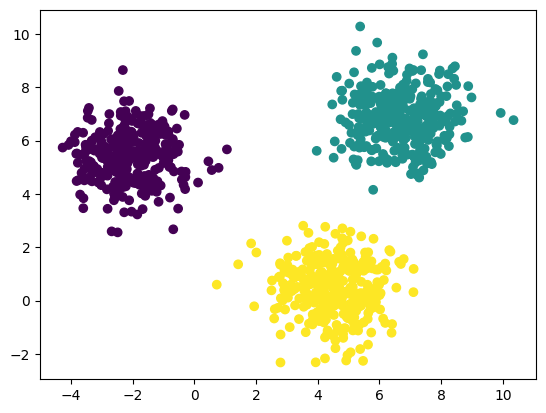

In [30]:

plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.0000000000005,
 691.1261455269936,
 122.47164263468454,
 105.08997156983837,
 88.55046385697095,
 71.1257138561772,
 73.01583976343227,
 57.59129846846013,
 54.8027100658823,
 46.98183797191088]

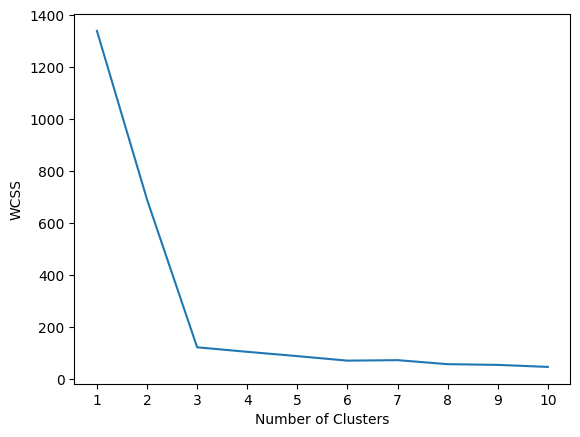

In [31]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

array([1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2,
       2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0,
       1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0,
       0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1,
       2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0,

In [17]:
y_pred=kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1,
       1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0,
       1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1,
       2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0,

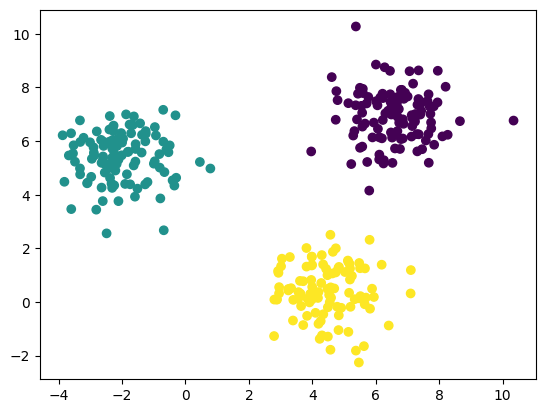

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

## Validating the k value (Two types of techniques)
1. kneelocator
2. Silhoutee scoring

In [21]:
## kneelocator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [23]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [24]:
kl.elbow

np.int64(3)

In [25]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [27]:
silhouette_coefficients

[np.float64(0.5337674450564903),
 np.float64(0.75544702159613),
 np.float64(0.6144605203486234),
 np.float64(0.481739437342804),
 np.float64(0.3677549917225531),
 np.float64(0.3570804899675826),
 np.float64(0.3575902228848362),
 np.float64(0.35401469681814185),
 np.float64(0.3660397263013915)]

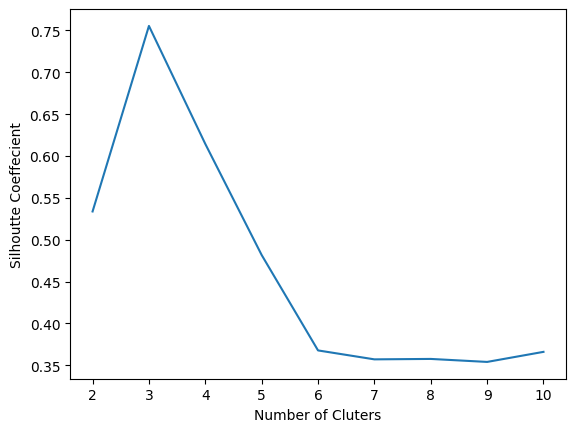

In [28]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

#### wherever the silhoute score is high we select that k...in above example k = 3 is selcted